## HUDF

### Importing libraries

In [135]:
import numpy as np
import sep
from astropy.io import fits  # or fitsio
import matplotlib.pyplot as plt

### Reading the f105w HUDF image

In [136]:
image_data = fits.getdata("hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits")

# Fixing byte order
image_data = image_data.byteswap().newbyteorder()

### Background subtraction


In [137]:
bkg = sep.Background(image_data, bw=64, bh=64, fw=3, fh=3)
data_sub = image_data - bkg

### Detect sources (tune the threshold if necessary)

In [138]:
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)
print("Number of sources detected:", len(objects))

Number of sources detected: 8640


### Aperture photometry (e.g., radius = 3 pixels)

In [139]:
flux, fluxerr, flag = sep.sum_circle(data_sub,
                                     objects['x'], objects['y'],
                                     3.0,
                                     err=bkg.globalrms,
                                     gain=1.0)

### Flux Analysis
Calculates largest outliers

In [140]:
print("First 20 flux values:", flux[:20])
print("Flux min:", np.min(flux))
print("Flux max:", np.max(flux))
print("Mean:", np.mean(flux))
print("Median:", np.median(flux))
print("Std dev of flux:", np.std(flux))
print(f"Largest outlier position: x={objects['x'][np.argmax(flux)]}, y={objects['y'][np.argmax(flux)]}")
print(f"Number of std dev from mean: {(flux[np.argmax(flux)] - np.mean(flux)) / np.std(flux)}")

First 20 flux values: [ 0.03128197  0.03101789 -0.02438809  0.00194706  0.01245725 -0.01122822
  0.02936754 -0.00912643  0.0480232   0.02783969  0.10468204  0.04495317
  0.01404299  0.01026503  0.01140038  0.02556239  0.01649832 -0.00842018
  0.00698051  0.01479127]
Flux min: -1.0613654278458449
Flux max: 807.2972835731507
Mean: 0.36186200072018937
Median: 0.03095655805023853
Std dev of flux: 9.24352784277779
Largest outlier position: x=1914.2549094866436, y=1134.3164850725645
Number of std dev from mean: 87.29734310292692


### Histogram of fluxes
SInce a very small amount of images are large no.s using log to represnt the distribution

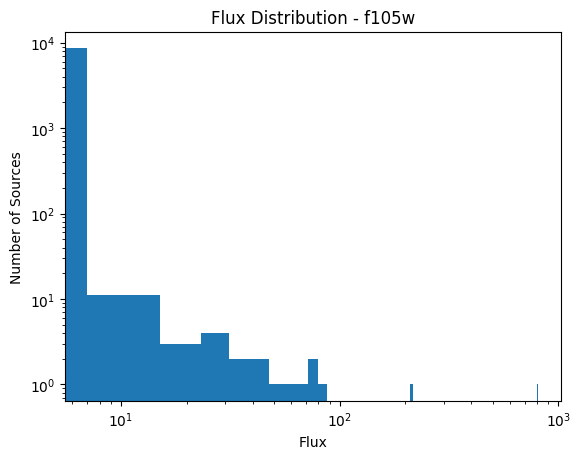

In [141]:
plt.figure()
plt.hist(flux, bins=100)
plt.xlabel("Flux")
plt.ylabel("Number of Sources")
plt.xscale('log')
plt.yscale('log')  # optional
plt.title("Flux Distribution - f105w")
plt.savefig("f105w_flux_hist.png")
plt.show()

## 3-Color False Image (f105w, f125w, f160w)

In [142]:
# Load each band
f105w_data = fits.getdata("hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits")
f125w_data = fits.getdata("hlsp_hudf12_hst_wfc3ir_udfmain_f125w_v1.0_drz.fits")
f160w_data = fits.getdata("hlsp_hudf12_hst_wfc3ir_udfmain_f160w_v1.0_drz.fits")

In [143]:
f105w_data = f105w_data.byteswap().newbyteorder()
f125w_data = f125w_data.byteswap().newbyteorder()
f160w_data = f160w_data.byteswap().newbyteorder()

### Stack into an RGB image
using np.dstack in the order [R, G, B] => [f160w, f125w, f105w]

In [144]:
rgb = np.dstack([f160w_data, f125w_data, f105w_data])

### Saving and displaying Images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9047293..74.44648].


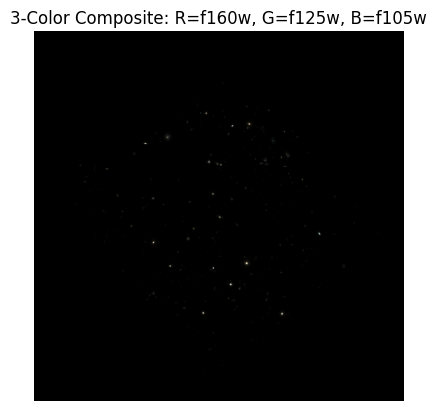

In [145]:
plt.figure()
plt.imshow(rgb, origin='lower')
plt.title("3-Color Composite: R=f160w, G=f125w, B=f105w")
plt.axis('off')
plt.savefig("HUDF_3color.png", dpi=150)
plt.show()